In [1]:
import docplex
from docplex.mp.model import Model
mdl = Model(name='my_prob')


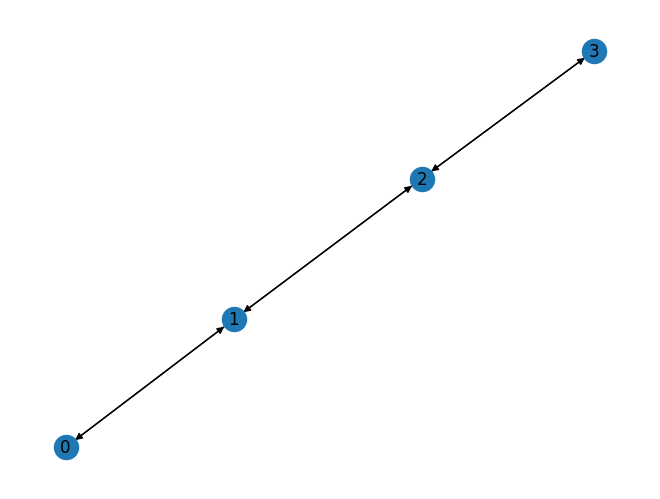

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
nodes=['0','1','2','3']
edges=[('0','1'),('1','0'),('1','2'),('2','1'),('2','3'),('3','2')]
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, )
plt.show()

['0', '1', '2', '3'] [('0', '1'), ('1', '0'), ('1', '2'), ('2', '1'), ('2', '3'), ('3', '2')]


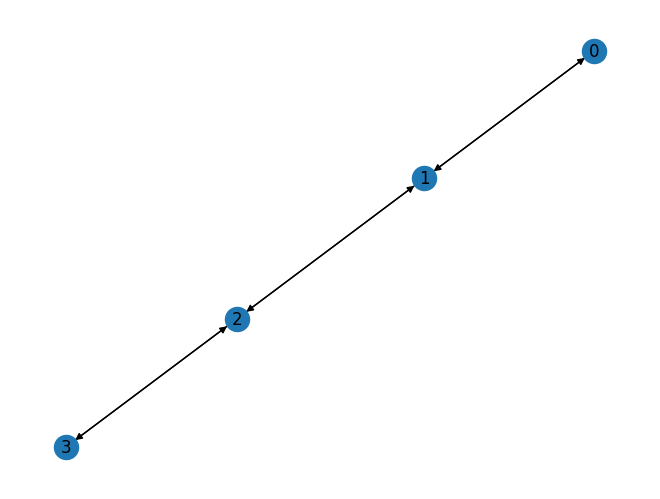

In [12]:
import os
import configparser
import ast
config_path = os.path.join(os.getcwd(), 'utils/topo_models.ini')
topo_config = configparser.ConfigParser()
topo_config.read(config_path)
nodes = topo_config.get('default', 'nodes')
nodes = ast.literal_eval(nodes)
edges = topo_config.get('default', 'edges')
edges = ast.literal_eval(edges)
print(nodes, edges)
G = nx.MultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, )
plt.show()

拓扑序列：[1, 2, 3, 4, 5, 6, 7, 8]
关键路径的顶点：[1, 3, 5, 6, 8]
关键路径的边：[(1, 3), (3, 5), (5, 6), (6, 8)]
关键路径长度：51


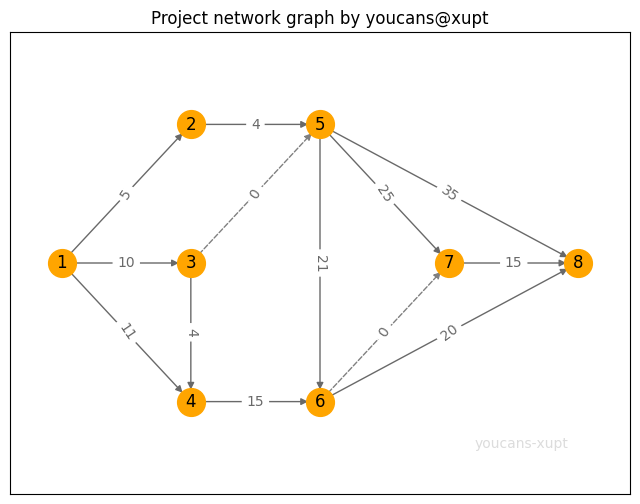

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. 拓扑序列(topological sequence) 和 关键路径(critical path)
# Activity on edge network(AOE), 顶点表示事件或状态，有向边表示活动
DG = nx.DiGraph()  # 创建：空的 有向图
DG.add_weighted_edges_from([(1, 2, 5), (1, 3, 10), (1, 4, 11),
                            (2, 5, 4),
                            (3, 4, 4), (3, 5, 0),
                            (4, 6, 15),
                            (5, 6, 21), (5, 7, 25), (5, 8, 35),
                            (6, 7, 0), (6, 8, 20),
                            (7, 8, 15)])  # 向图中添加多条赋权边: (n1,n2,weight)

lenNodes = len(DG.nodes) # 顶点数量
topoSeq = list(nx.topological_sort(DG)) # 拓扑序列
nodeCP = list(nx.dag_longest_path(DG))  # 关键路径（节点）
lenCP = nx.dag_longest_path_length(DG)  # 关键路径的长度
edgesCP=[]
for k in range(1,len(nodeCP)):
    edgesCP.append((nodeCP[k-1],nodeCP[k]))

print("拓扑序列：{}".format(topoSeq))  # [1, 3, 4, 2, 5, 6, 7, 8]
print("关键路径的顶点：{}".format(nodeCP))  # [1, 3, 5, 6, 8]
print("关键路径的边：{}".format(edgesCP))  # [(1, 3), (3, 5), (5, 6), (6, 8)]
print("关键路径长度：{}".format(lenCP))  # 51

fig, ax = plt.subplots(figsize=(8,6))
pos = {1:(0,4), 2:(5,7), 3:(5,4), 4:(5,1), 5:(10,7), 6:(10,1), 7:(15,4), 8:(20,4)}  # 指定顶点位置
edgesDG = DG.edges
edgesDashed = [(3,5),(6,7)]
edgesSolid = list(set(edgesDG)-set(edgesDashed))
labels = nx.get_edge_attributes(DG, 'weight')
# nx.draw(DG, pos, with_labels=True, node_color='skyblue')  # 绘制有向图
nx.draw_networkx_nodes(DG, pos, node_color='orange',node_size=400)  # 设置指定顶点的颜色、宽度
nx.draw_networkx_labels(DG, pos)  # 设置指定顶点的标签
nx.draw_networkx_edges(DG, pos, edgelist=edgesSolid, edge_color='dimgrey', style='solid')  # 设置指定边的颜色、线型
nx.draw_networkx_edges(DG, pos, edgelist=edgesDashed, edge_color='grey', style='dashed')  # 设置指定边，虚线
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels, font_color='dimgrey')  # 显示边的权值
ax.set_title("Project network graph by youcans@xupt")
ax.text(16, 0, "youcans-xupt", color='gainsboro')
plt.xlim(-2, 22)
plt.ylim(-1, 9)
plt.axis('on')
plt.show()  # YouCans, XUPT

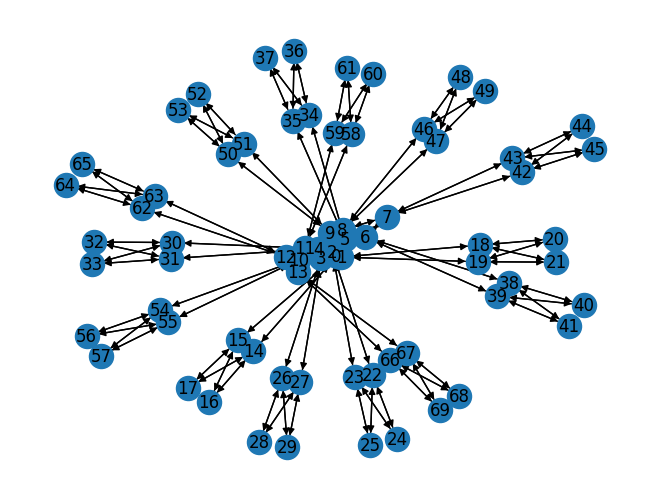

In [1]:
from utils.topo import Topo
import matplotlib.pyplot as plt
import networkx as nx

lstopo = Topo('leaf-spine')
lsgraph = lstopo.getGraph()
nx.draw(lsgraph, with_labels=True, )
plt.show()

In [124]:
import numpy as np

def generate_random_numbers():
    # 生成符合正态分布的随机数
    random_numbers = np.random.normal(loc=3.3, scale=1.0, size=3)

    # 调整随机数，使其总和为10
    adjusted_numbers = random_numbers / np.sum(random_numbers) * 10

    rounded_integers = np.ceil(adjusted_numbers)

    diff = 10 - int(np.sum(rounded_integers))

    rounded_integers[0] += diff

    return rounded_integers

result = generate_random_numbers()
print("生成的随机数:", result)
print("总和:", np.sum(result))

result = [int(x) for x in result]
dag_list = []
dag_num = 1
for i in range(3):
    dag_list.append(list(range(dag_num, dag_num + result[i])))
    dag_num += result[i]
print(dag_list)

生成的随机数: [1. 3. 6.]
总和: 10.0
[[1], [2, 3, 4], [5, 6, 7, 8, 9, 10]]


[ 7.81557352  9.7446265   6.18294998 10.36865849]
[6, 8, 6, 10]
0
6
14


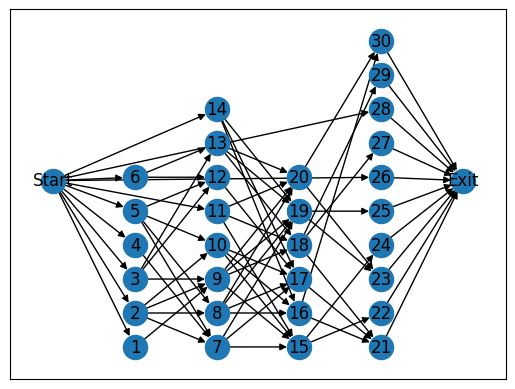

<function matplotlib.pyplot.clf() -> 'None'>

In [3]:
from utils.topo import Topo

test_topo = Topo()
edges, into_degree, out_degree, position = test_topo.DAGs_generate(nodes_num=30, max_out=4, alpha=1.2, beta=2.0)
# print(edges)

test_topo.plot_DAG(edges, position)

In [9]:
print(list(range(3)))

[0, 1, 2]
